Number of structures with abnormal forces: 503 out of 1350 in perturbations_Aug20_1350structs.xyz
Number of structures with abnormal forces: 114 out of 1347 in solvation_Aug20_1347structs.xyz


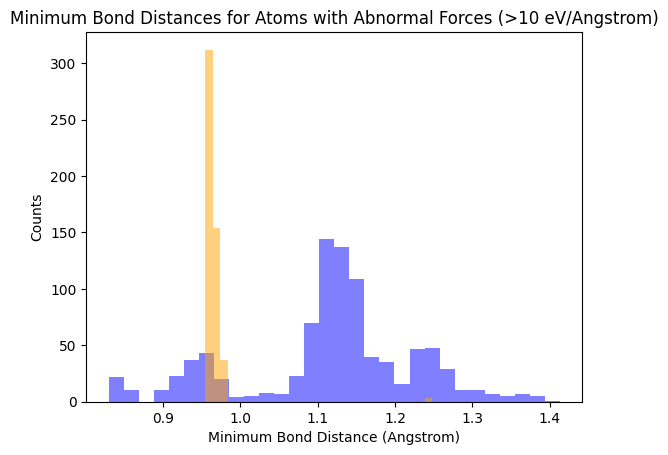

In [2]:
from ase import Atoms
from ase.io import read, write
import numpy as np
import ase.neighborlist as nl

def min_bond_dis(
    atoms: Atoms,
    indices: list[int],
):
    min_distances = []
    sent_indices, receive_indices, distances = nl.neighbor_list(
        "ijd",
        atoms,
        cutoff=3.0,
        self_interaction=False,
    )
    for indiex in indices:
        mask = sent_indices == indiex
        dis_i = distances[mask]
        min_distances.append(np.min(dis_i))
    return min_distances
    
min_bond_distances_per = []
atoms_list: list[Atoms] = read("/nethome/lkong88/mof-foundational/databases/perturbations_Aug20_1350structs.xyz", index=":")
abnormal_counts = 0
for atoms in atoms_list:
    forces = np.array(atoms.get_forces())
    forces_norms = np.linalg.norm(forces, axis=1)
    if np.any(forces_norms > 10.0):
        abnormal_counts += 1
        indices = np.where(forces_norms > 10.0)[0].tolist()
        min_bond_distances_per.extend(min_bond_dis(atoms, indices))
print(f"Number of structures with abnormal forces: {abnormal_counts} out of {len(atoms_list)} in perturbations_Aug20_1350structs.xyz")

min_bond_distances_sol = []
atoms_list: list[Atoms] = read("/nethome/lkong88/mof-foundational/databases/solvation_Aug20_1347structs.xyz", index=":")
abnormal_counts = 0
for atoms in atoms_list:
    forces = np.array(atoms.get_forces())
    forces_norms = np.linalg.norm(forces, axis=1)
    if np.any(forces_norms > 10.0):
        abnormal_counts += 1
        indices = np.where(forces_norms > 10.0)[0].tolist()
        min_bond_distances_sol.extend(min_bond_dis(atoms, indices))
print(f"Number of structures with abnormal forces: {abnormal_counts} out of {len(atoms_list)} in solvation_Aug20_1347structs.xyz")


import matplotlib.pyplot as plt
plt.hist(min_bond_distances_per, bins=30, alpha=0.5, label='Perturbations', color='blue')
plt.hist(min_bond_distances_sol, bins=30, alpha=0.5, label='Solvation', color='orange')
plt.xlabel("Minimum Bond Distance (Angstrom)")
plt.ylabel("Counts")
plt.title("Minimum Bond Distances for Atoms with Abnormal Forces (>10 eV/Angstrom)")
plt.show()